In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("all wbborking")

all wbborking


In [11]:
# Load the dataset
data_path = r"E:\amr\Pr_ML\enhanced_dataset.csv"
df = pd.read_csv(data_path)
df.head()


,student_id,name,email,gender,major,gpa,country,enrollment_year,year_level,student_name,...,Quizzes_Avg,prev_score,Study_Hours_per_Week,Attendance (%),Participation_Score,Stress_Level,Sleep_Hours_per_Night,time_spent,clickstream,activity
0,372011,Shandie Phant L,sphantab11@xinhuanet.com,Female,Data Science,3.23,Peru,2019,Freshman,Shandie Phant L,...,51.020408,85,96.0,96.981906,50,44.444444,11.233975,90.000000,normal,online_courses
1,45201,Emile Ellacott T,eellacott18201@plala.or.jp,Male,Economics,3.07,Peru,2020,Senior,Solly Stops,...,77.551020,69,12.0,26.602468,0,100.000000,0.000000,12.962963,unusual,none
2,228592,Nevin Pfeffel U,npfeffel6b592@howstuffworks.com,Male,Biology,2.20,Thailand,2022,Junior,Nevin Pfeffel U,...,83.673469,93,0.0,17.068649,40,66.666667,0.000000,10.000000,normal,none
3,179202,Trix Peat U,tpeat4y202@shop-pro.jp,Female,Data Science,2.35,Yemen,2024,Sophomore,Carolus Blowne,...,46.938776,42,84.0,66.274547,40,77.777778,0.000000,95.185185,unusual,online_forum
4,443202,Pall Fotherby U,pfotherbyca202@howstuffworks.com,Male,Psychology,2.79,China,2022,Freshman,Ardelis Rojahn,...,97.959184,58,84.0,57.436822,50,66.666667,0.000000,87.777778,unusual,study_group


In [13]:
# Check the data types of all columns to identify categorical columns
print(df.dtypes)


student_id                 int64
name                      object
email                     object
gender                    object
major                     object
gpa                      float64
country                   object
enrollment_year            int64
year_level                object
student_name              object
subject                   object
quiz_date                 object
device_used                 int8
status                    object
quiz_id                  float64
duration_limit           float64
question_count           float64
Midterm_Score            float64
Assignments_Avg          float64
Quizzes_Avg              float64
prev_score                 int64
Study_Hours_per_Week     float64
Attendance (%)           float64
Participation_Score        int64
Stress_Level             float64
Sleep_Hours_per_Night    float64
time_spent               float64
clickstream               object
activity                  object
dtype: object


In [22]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values by dropping rows with missing data (or alternatively, fill them with a strategy like mean or median)
df = df.dropna()  # Drop rows with missing values


student_id               0
name                     0
email                    0
gender                   0
major                    0
gpa                      0
country                  0
enrollment_year          0
year_level               0
student_name             0
subject                  0
quiz_date                0
device_used              0
status                   0
quiz_id                  0
duration_limit           0
question_count           0
Midterm_Score            0
Assignments_Avg          0
Quizzes_Avg              0
prev_score               0
Study_Hours_per_Week     0
Attendance (%)           0
Participation_Score      0
Stress_Level             0
Sleep_Hours_per_Night    0
time_spent               0
clickstream              0
activity                 0
dtype: int64


In [45]:
# Encode 'clickstream' and 'device_used' columns as they are categorical features
label_encoder = LabelEncoder()

# Encode 'clickstream' column (if categorical)
df['clickstream'] = label_encoder.fit_transform(df['clickstream'])

# Encode 'device_used' column (if categorical)
df['device_used'] = label_encoder.fit_transform(df['device_used'])

# Check the unique values in the encoded columns
print(df['clickstream'].unique())
print(df['device_used'].unique())

#============================click stream===================
#normal >>1
#unusual >>3
#random_answers >>2
#consistent_answers >>0
#===========================device_used====================
#Desktop >> 0
#Laptop >> 1
#Phone >> 2
#Tablet >> 3

[1 3 2 0]
[2 3 1 0]


In [34]:
# Define features (X) and target (y)
X = df[['clickstream', 'time_spent', 'device_used', 'Study_Hours_per_Week', 'Stress_Level', 'Attendance (%)', 'Participation_Score']]  # Features
y = df['status']  # Target: status (Cheated or Not Cheated)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (84515, 7)
Testing set shape: (21129, 7)


In [36]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the feature data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the first few rows of the scaled data
print(X_train_scaled[:5])


[[ 1.15856353e+00 -7.55938607e-01 -7.36398344e-01 -6.02585856e-01
   2.70773218e-02 -9.60167633e-02  3.19433757e-01]
 [-3.81480459e-01  7.01511300e-01  1.23908789e+00  4.64546203e-01
   2.70773218e-02  2.69868716e-01 -3.13102037e-01]
 [-1.15150246e+00  1.35073899e+00 -7.36398344e-01  1.53167826e+00
  -1.29362090e+00  1.89316403e+00  9.51969552e-01]
 [ 1.15856353e+00  8.07507657e-01  2.51344773e-01  8.64720726e-01
   3.57251878e-01  1.19054821e-03 -6.29369935e-01]
 [ 1.15856353e+00  1.60248033e+00  1.23908789e+00  1.66506977e+00
   1.01760099e+00  1.32584965e+00 -6.29369935e-01]]


In [37]:
# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
print("Random Forest Classifier - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classifier - Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier - Accuracy: 0.7254011074826069
Random Forest Classifier - Classification Report:
               precision    recall  f1-score   support

     cheated       0.60      0.53      0.56      7054
 not cheated       0.78      0.82      0.80     14075

    accuracy                           0.73     21129
   macro avg       0.69      0.68      0.68     21129
weighted avg       0.72      0.73      0.72     21129



In [38]:
# Initialize the Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
print("SVM Classifier - Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classifier - Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classifier - Accuracy: 0.753230157603294
SVM Classifier - Classification Report:
               precision    recall  f1-score   support

     cheated       0.66      0.53      0.59      7054
 not cheated       0.79      0.87      0.82     14075

    accuracy                           0.75     21129
   macro avg       0.72      0.70      0.71     21129
weighted avg       0.75      0.75      0.75     21129



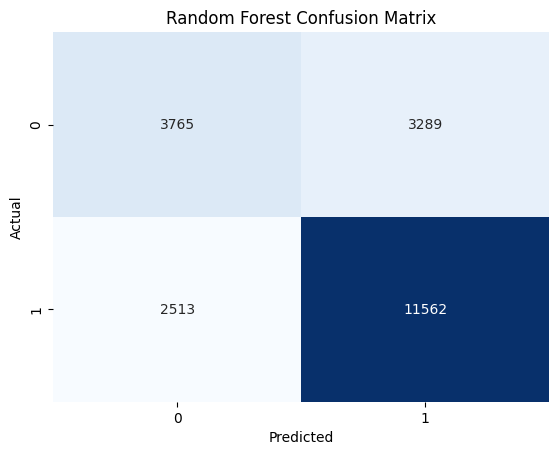

In [40]:
# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


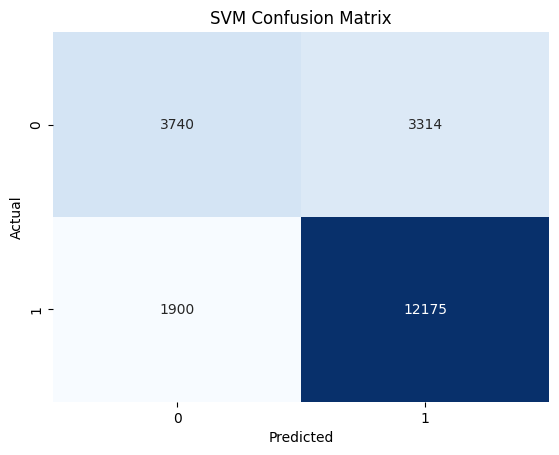

In [41]:
# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [43]:
# Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Display the DataFrame directly
print(results_df)


           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.725401   0.689123  0.677598  0.682113
1            SVM  0.753230   0.724581  0.697602  0.706446


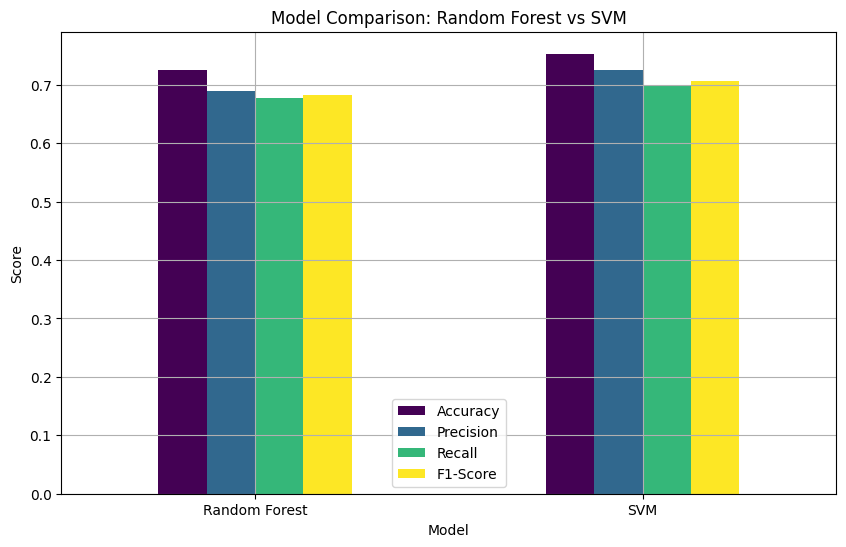

In [44]:
# Create a bar plot to compare the models
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Add labels and title
plt.title('Model Comparison: Random Forest vs SVM')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
